# Titanic survival - Regularisation

## Load modules

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

## Load data

In [2]:
data = pd.read_csv('C:/t_data/processed_data.csv')
# Make all data 'float' type
data = data.astype(float)

In [3]:
# Drop Passengerid (axis=1 indicates we are removing a column rather than a row)
data.drop('PassengerId', inplace=True, axis=1)

In [4]:
#Divide into X (features) and y (labels)
# Split data into two DataFrames
X_df = data.drop('Survived',axis=1)
y_df = data['Survived']

# Convert DataFrames to NumPy arrays
X = X_df.values
y = y_df.values

## Reduce the number of samples, and increase the number of features

In [5]:
# Reduce number of samples
data = data.sample(150)

In [6]:
# Add polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X = poly.fit_transform(X)

In [7]:
#Define function to standardise data
def standardise_data(X_train, X_test):
    
    # Initialise a new scaling object for normalising input data
    sc = StandardScaler() 

    # Set up the scaler just on the training set
    sc.fit(X_train)

    # Apply the scaler to the training and test sets
    train_std=sc.transform(X_train)
    test_std=sc.transform(X_test)
    
    return train_std, test_std

In [8]:
#Training and testing the model for all k-fold splits
reg_values = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

# Set up lists to hold results
training_acc_results = []
test_acc_results = []

# Set up splits
skf = StratifiedKFold(n_splits = 5)
skf.get_n_splits(X, y)

# Set up model type

for reg in reg_values:
    # Show progress
    print(reg, end=' ')
    
    # Set up lists for results for each of k splits
    training_k_results = []
    test_k_results = []
    # Loop through the k-fold splits
    for train_index, test_index in skf.split(X, y):
        # Get X and Y train/test
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Standardise X data
        X_train_std, X_test_std = standardise_data(X_train, X_test)
        # Fit model with regularisation (C)
        model = LogisticRegression(C=reg, solver='lbfgs', max_iter=1000)
        model.fit(X_train_std,y_train)
        # Predict training and test set labels
        y_pred_train = model.predict(X_train_std)
        y_pred_test = model.predict(X_test_std)
        # Calculate accuracy of training and test sets
        accuracy_train = np.mean(y_pred_train == y_train)
        accuracy_test = np.mean(y_pred_test == y_test)
        # Record accuracy for each k-fold split
        training_k_results.append(accuracy_train)
        test_k_results.append(accuracy_test)
    # Record average accuracy for each k-fold split
    training_acc_results.append(np.mean(training_k_results))
    test_acc_results.append(np.mean(test_k_results))

0.001 0.003 0.01 0.03 0.1 0.3 1 3 10 

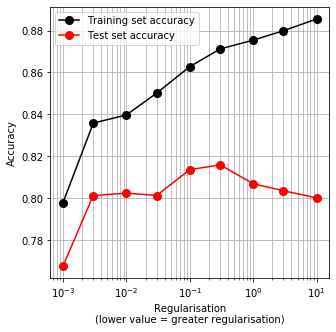

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# Define data for chart
x = reg_values
y1 = training_acc_results
y2 = test_acc_results

# Set up figure
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)

# Plot training set accuracy
ax1.plot(x, y1,
        color = 'k',
        linestyle = '-',
        markersize = 8,
        marker = 'o',
        markerfacecolor='k',
        markeredgecolor='k',
        label  = 'Training set accuracy')

# Plot test set accuracy
ax1.plot(x, y2,
        color = 'r',
        linestyle = '-',
        markersize = 8,
        marker = 'o',
        markerfacecolor='r',
        markeredgecolor='r',
        label  = 'Test set accuracy')

# Custimise axes
ax1.grid(True, which='both')
ax1.set_xlabel('Regularisation\n(lower value = greater regularisation)')
ax1.set_ylabel('Accuracy')
ax1.set_xscale('log')

# Add legend
ax1.legend()

# Show plot
plt.show()

Note in the above figure that:

1) Accuracy of training set is significantly higher than accuracy of test set (a common sign of over-fitting).

2) There is an optimal value for the regularisation constant, C. In this case that value is about 0.1 (default if not specified is 1.0).